<a href="https://colab.research.google.com/github/Deeksha-Pandit/EVA4-S11/blob/master/S11_Trial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h3>Install Albumentations and Apex librabies</h3>**

In [0]:
%matplotlib inline

In [2]:
!pip install -U git+https://github.com/albu/albumentations
!pip install --no-cache-dir git+https://github.com/NVIDIA/apex

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-6_5n8sr7
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-6_5n8sr7
     |████████████████████████████████| 634kB 1.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=f79d0f61b80d6c08458cd2319c2a4fee83bbaeeeca9814cd097ccaf91c9c13f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-s6uad9qf/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=62640390a07ead3c0a0d7c493fc374e1d3b66db7d9a3432a39a6e3907eeffea4
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

**<h3>Mount Drive<h3>**

In [3]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Session11'
sys.path.append(folder)

In [0]:
import torch
import Albumentation
import show_images
import my_model
import train_test
import evaluate
import GradCam
import lr_finder

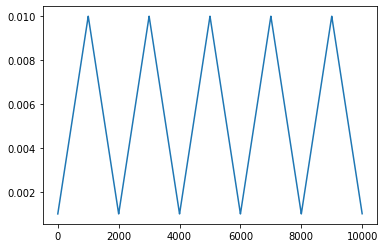

In [6]:
import matplotlib.pyplot as plt
import numpy as np

lr_plot=[]
def CyclicTriangle(iterations,minimum_lr,maximum_lr,step_size):
  for i in range(iterations):
    cycle = np.floor(1+i/(2*step_size))
    x = np.abs((i/step_size)-2*cycle+1)
    lr = minimum_lr + ((maximum_lr-minimum_lr)*(1-x))
    lr_plot.append(lr)
  plt.plot(list(range(iterations)),lr_plot)
CyclicTriangle(iterations=10000,minimum_lr=0.001,maximum_lr=0.01,step_size=1000)

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [7]:
classes, trainloader, testloader = Albumentation.album_Compose.load()

CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



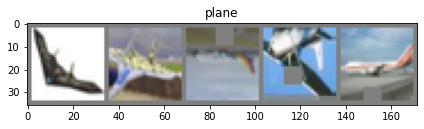

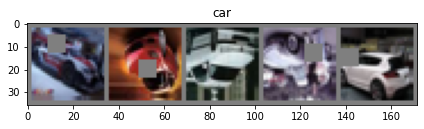

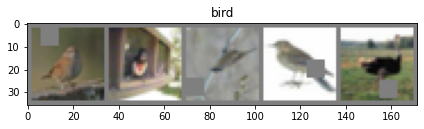

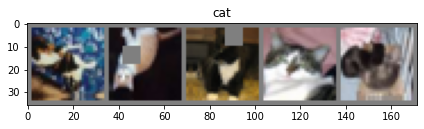

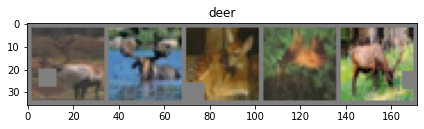

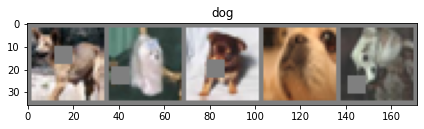

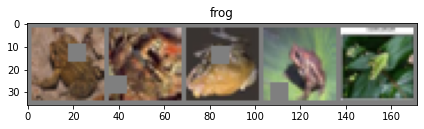

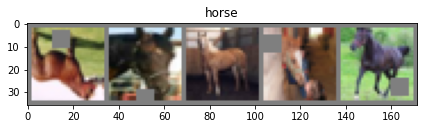

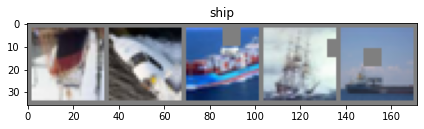

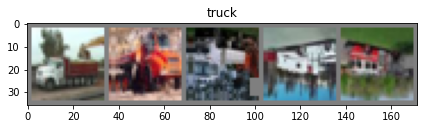

In [8]:
show_images.show_random_images(trainloader, classes)

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
resnet = my_model.ResNet().to(device)
summary(resnet, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.01,momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr = 0.01, total_steps=None, epochs=24, steps_per_epoch=1, pct_start=0.5, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85, max_momentum=0.95, div_factor=10)
#lrfinder = lr_finder.LRFinder(resnet, optimiser, criterion, device="cuda")
#lrfinder.range_test(trainloader, val_loader=testloader, end_lr=1, num_iter=600 ,step_mode="exp")

In [0]:
#import torch.nn as nn
# import torch.optim as optim
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(resnet.parameters(), lr=Best_lr,momentum=0.9 ,weight_decay = 0.0001)
# scheduler = ReduceLROnPlateau(optimizer, patience = 3,min_lr=1e-4)

In [11]:
train_loss=[]
train_acc=[]
EPOCHS = 24
LR_list = []
for epoch in range(EPOCHS):
      print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
      LR_list.append(optimizer.param_groups[0]['lr'])
      train_loss, train_acc = train_test.train(resnet, device, trainloader, optimizer, criterion, epoch)
      scheduler.step()
      test_loss , test_acc = train_test.test(resnet, device, criterion, testloader)
      #scheduler.step()

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.001


Loss=1.4278638362884521 Batch_id=97 Accuracy=36.58: 100%|██████████| 98/98 [00:16<00:00,  5.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 4923/10000 (49.23%)

EPOCH: 2 LR: 0.0018181818181818182


Loss=1.2219473123550415 Batch_id=97 Accuracy=52.14: 100%|██████████| 98/98 [00:16<00:00,  5.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 5744/10000 (57.44%)

EPOCH: 3 LR: 0.0026363636363636363


Loss=0.974094033241272 Batch_id=97 Accuracy=58.96: 100%|██████████| 98/98 [00:16<00:00,  5.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 6051/10000 (60.51%)

EPOCH: 4 LR: 0.0034545454545454545


Loss=0.9274996519088745 Batch_id=97 Accuracy=63.97: 100%|██████████| 98/98 [00:17<00:00,  5.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6330/10000 (63.30%)

EPOCH: 5 LR: 0.0042727272727272735


Loss=0.798821747303009 Batch_id=97 Accuracy=67.20: 100%|██████████| 98/98 [00:17<00:00,  5.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 6997/10000 (69.97%)

EPOCH: 6 LR: 0.005090909090909091


Loss=0.7911786437034607 Batch_id=97 Accuracy=70.75: 100%|██████████| 98/98 [00:16<00:00,  5.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7422/10000 (74.22%)

EPOCH: 7 LR: 0.005909090909090909


Loss=0.7394146919250488 Batch_id=97 Accuracy=73.62: 100%|██████████| 98/98 [00:17<00:00,  5.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7353/10000 (73.53%)

EPOCH: 8 LR: 0.006727272727272728


Loss=0.6870259046554565 Batch_id=97 Accuracy=74.73: 100%|██████████| 98/98 [00:17<00:00,  5.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7550/10000 (75.50%)

EPOCH: 9 LR: 0.007545454545454546


Loss=0.6513834595680237 Batch_id=97 Accuracy=75.50: 100%|██████████| 98/98 [00:17<00:00,  5.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7698/10000 (76.98%)

EPOCH: 10 LR: 0.008363636363636365


Loss=0.549235463142395 Batch_id=97 Accuracy=78.69: 100%|██████████| 98/98 [00:17<00:00,  5.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 6461/10000 (64.61%)

EPOCH: 11 LR: 0.009181818181818183


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7763/10000 (77.63%)

EPOCH: 12 LR: 0.010000000000000002


Loss=0.49769216775894165 Batch_id=97 Accuracy=80.46: 100%|██████████| 98/98 [00:17<00:00,  5.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 8021/10000 (80.21%)

EPOCH: 13 LR: 0.009166675


Loss=0.5676455497741699 Batch_id=97 Accuracy=82.67: 100%|██████████| 98/98 [00:17<00:00,  5.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8258/10000 (82.58%)

EPOCH: 14 LR: 0.00833335


Loss=0.4473215341567993 Batch_id=97 Accuracy=84.45: 100%|██████████| 98/98 [00:17<00:00,  5.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8216/10000 (82.16%)

EPOCH: 15 LR: 0.0075000250000000004


Loss=0.41875118017196655 Batch_id=97 Accuracy=86.56: 100%|██████████| 98/98 [00:17<00:00,  5.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8409/10000 (84.09%)

EPOCH: 16 LR: 0.0066667


Loss=0.37130916118621826 Batch_id=97 Accuracy=87.21: 100%|██████████| 98/98 [00:17<00:00,  5.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8415/10000 (84.15%)

EPOCH: 17 LR: 0.005833375


Loss=0.3181294798851013 Batch_id=97 Accuracy=88.69: 100%|██████████| 98/98 [00:17<00:00,  5.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8548/10000 (85.48%)

EPOCH: 18 LR: 0.00500005


Loss=0.25444716215133667 Batch_id=97 Accuracy=89.97: 100%|██████████| 98/98 [00:17<00:00,  5.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8543/10000 (85.43%)

EPOCH: 19 LR: 0.004166725


Loss=0.23000209033489227 Batch_id=97 Accuracy=90.86: 100%|██████████| 98/98 [00:17<00:00,  5.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8610/10000 (86.10%)

EPOCH: 20 LR: 0.0033334000000000003


Loss=0.2135695219039917 Batch_id=97 Accuracy=91.88: 100%|██████████| 98/98 [00:17<00:00,  5.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8765/10000 (87.65%)

EPOCH: 21 LR: 0.002500074999999999


Loss=0.20747514069080353 Batch_id=97 Accuracy=92.88: 100%|██████████| 98/98 [00:17<00:00,  5.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8766/10000 (87.66%)

EPOCH: 22 LR: 0.0016667499999999998


Loss=0.1926858127117157 Batch_id=97 Accuracy=93.17: 100%|██████████| 98/98 [00:17<00:00,  5.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8794/10000 (87.94%)

EPOCH: 23 LR: 0.0008334250000000005


Loss=0.17467769980430603 Batch_id=97 Accuracy=93.66: 100%|██████████| 98/98 [00:17<00:00,  5.60it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8800/10000 (88.00%)

EPOCH: 24 LR: 9.999999999940612e-08


Loss=0.2450375109910965 Batch_id=97 Accuracy=93.99: 100%|██████████| 98/98 [00:17<00:00,  5.59it/s]



Test set: Average loss: 0.0007, Accuracy: 8801/10000 (88.01%)



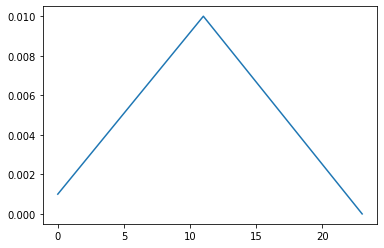

In [12]:
plt.plot(LR_list)

In [13]:
evaluate.evaluate_accuracy(resnet, device, testloader)

Accuracy of the network on the 10000 test images: 88.010 %


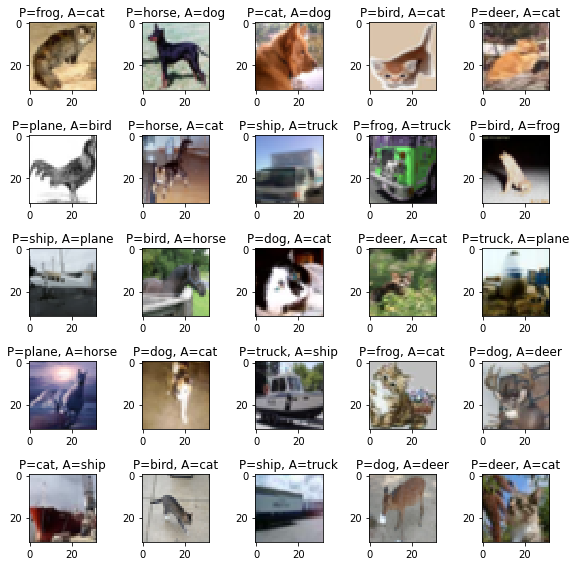

In [15]:
misclassified_images = evaluate.show_misclassified_images(resnet, device, testloader, classes)

In [16]:
evaluate.evaluate_classwise_accuracy(resnet, device, classes, testloader)

Accuracy of plane : 85 %
Accuracy of   car : 100 %
Accuracy of  bird : 92 %
Accuracy of   cat : 42 %
Accuracy of  deer : 77 %
Accuracy of   dog : 83 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 80 %


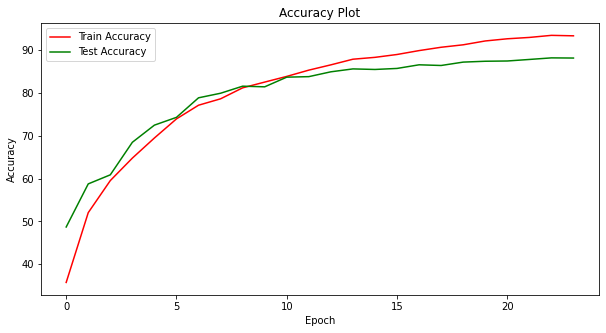

In [17]:
#import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1,2, figsize=(15,10))

# axs[0].plot(train_acc)
# axs[0].plot(test_acc)
# axs[0].set_title("Accuracy Change")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.plot(train_test.train_acc_epoch_end,color = 'r',label="Train Accuracy")
ax.plot(train_test.test_acc,color = 'g',label="Test Accuracy")
ax.set(title="Accuracy Plot", xlabel="Epoch", ylabel="Accuracy")
ax.legend()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from torchvision.utils import make_grid, save_image
fig = plt.figure(figsize=(23,30))
for i,k in enumerate(misclassified_images):
  images1 = [misclassified_images[i][0].cpu()/2+0.5]
  images2 =  [misclassified_images[i][0].cpu()/2+0.5]
  b = resnet.to(device)
  # output = model(misclassified_images[i][0])
  # _, predicted = torch.max(output.data, 1)
  #print(classes[int(predicted)])
  layers =  [resnet.layer1]
  for j in layers:
    g = GradCam.GradCAM(b,j)
    mask, _= g(misclassified_images[i][0].clone().unsqueeze_(0))
    heatmap, result = GradCam.GradCAM.visualize_cam(mask,misclassified_images[i][0].clone().unsqueeze_(0)/2+0.5 )
    images1.extend([heatmap])
    images2.extend([result])
  grid_image = make_grid(images1+images2,nrow=5,pad_value=1)
  npimg = grid_image.numpy()
  sub = fig.add_subplot(9, 3, i+1) 
 
  # fig.subplots_adjust(wspace=0)
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  sub.set_title('P = '+classes[int(misclassified_images[i][1])]+" A = "+classes[int(misclassified_images[i][2])],fontweight="bold",fontsize=18)
  sub.axis("off")
plt.tight_layout()
fig.subplots_adjust(wspace=0)

AttributeError: ignored

<Figure size 1656x2160 with 0 Axes>